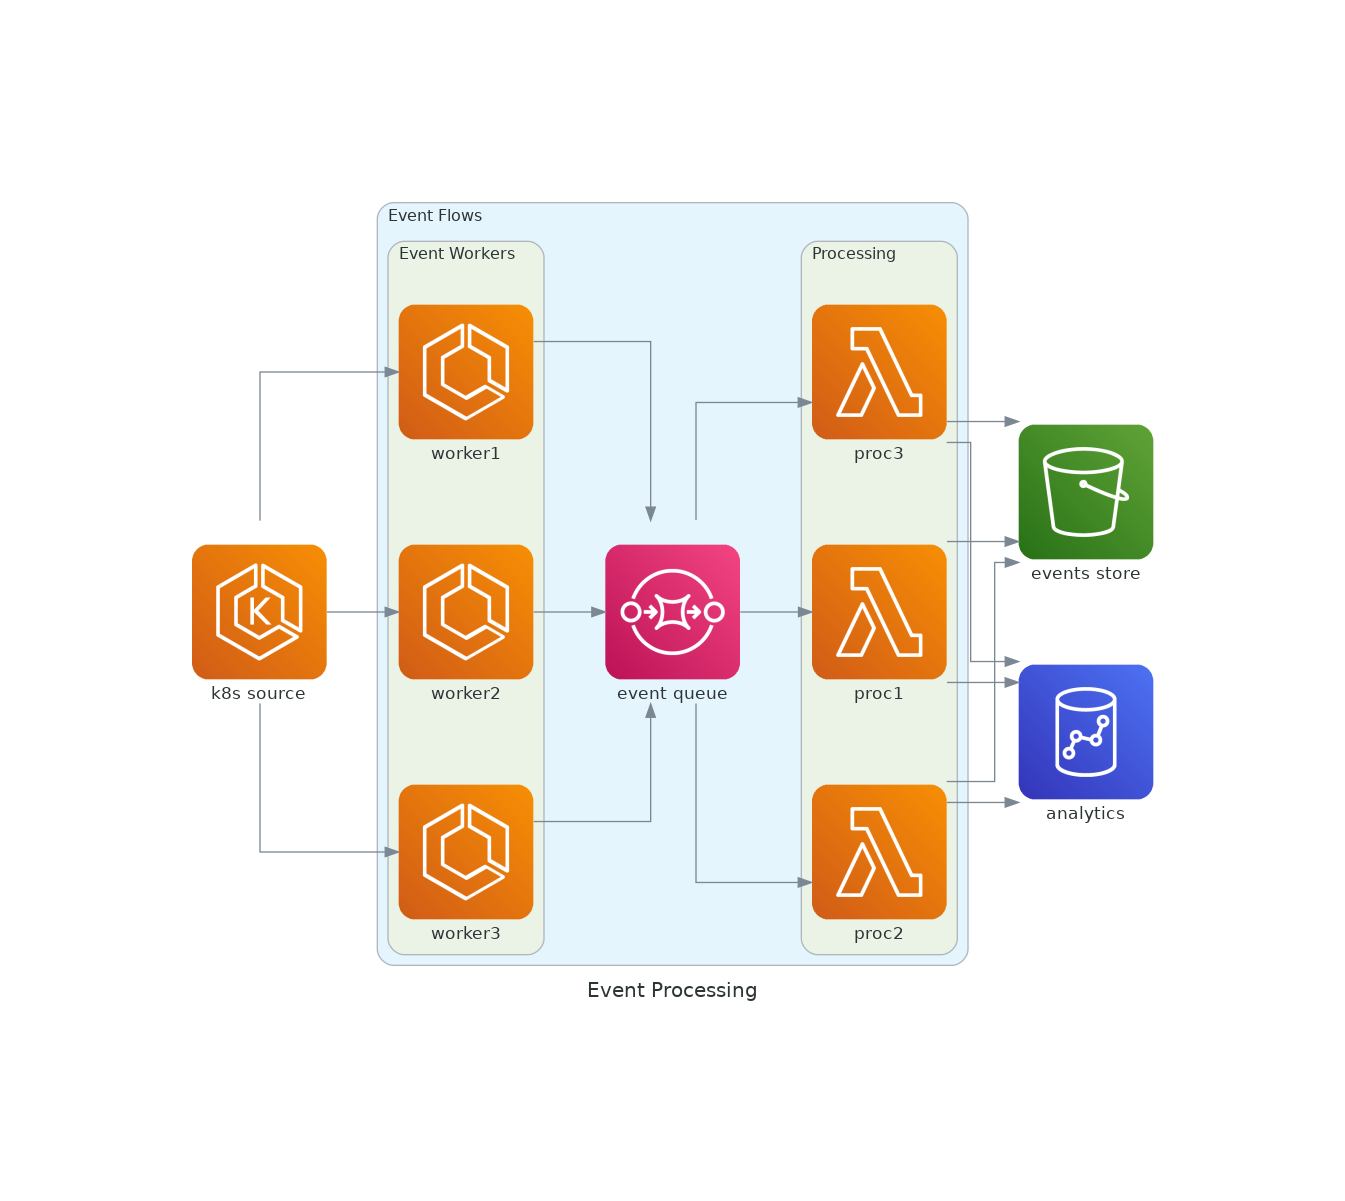

In [3]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as diag:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
    
diag